<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 176.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 196.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 133.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 156.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 153.0 MB/s eta 0:00:00


Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [3]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [5]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [9]:
## Write your code here
total_duplicates = df.duplicated().sum()
#print(f"1. Total duplicate rows (entire row): {total_duplicates}")
duplicate_rows = df[df.duplicated(keep=False)]  
#print(f"\n2. All duplicate rows (count: {len(duplicate_rows)}):")
#print(duplicate_rows.head(10))
responseid_duplicates = df['ResponseId'].duplicated().sum()
print(f"\n3. Duplicate ResponseId values: {responseid_duplicates}")
print("\n4. First few complete duplicate rows (all columns identical):")
complete_duplicates = df[df.duplicated()]
print(complete_duplicates.head())


3. Duplicate ResponseId values: 20

4. First few complete duplicate rows (all columns identical):
       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [11]:
## Write your code here
selected_columns = ['MainBranch', 'Employment', 'RemoteWork']
print(f"1. Checking duplicates based on columns: {selected_columns}")
subset_duplicates = df.duplicated(subset=selected_columns, keep=False)
print(f"   Number of rows with duplicate values in these columns: {subset_duplicates.sum()}")
print("\n2. Analyzing identical values in duplicate rows:")
duplicate_groups = df[subset_duplicates].groupby(selected_columns)
for name, group in list(duplicate_groups)[:3]:
    print(f"\n   Duplicate group for {selected_columns}:")
    print(f"   Values: {dict(zip(selected_columns, name))}")
    print(f"   Number of rows in group: {len(group)}")
    print("   Columns with identical values across all rows in this group:")
    identical_cols = []
    for col in df.columns:
        if group[col].nunique() == 1:  # All values in this column are identical
            identical_cols.append(col)
    print(f"   {len(identical_cols)} columns have identical values")
    if identical_cols:
        print(f"   Sample identical columns: {identical_cols[:10]}")

print("\n3. Most common duplicate patterns:")

pattern_counts = df[selected_columns].value_counts().reset_index(name='count')
pattern_counts = pattern_counts[pattern_counts['count'] > 1]

print(f"   Number of duplicate patterns: {len(pattern_counts)}")
print("\n   Top 5 most common duplicate patterns:")
for i, row in pattern_counts.head().iterrows():
    print(f"   Pattern {i+1}: {row['MainBranch']} | {row['Employment']} | {row['RemoteWork']} - Count: {row['count']}")        

1. Checking duplicates based on columns: ['MainBranch', 'Employment', 'RemoteWork']
   Number of rows with duplicate values in these columns: 65290

2. Analyzing identical values in duplicate rows:

   Duplicate group for ['MainBranch', 'Employment', 'RemoteWork']:
   Values: {'MainBranch': 'I am a developer by profession', 'Employment': 'Employed, full-time', 'RemoteWork': 'Hybrid (some remote, some in-person)'}
   Number of rows in group: 15288
   Columns with identical values across all rows in this group:
   4 columns have identical values
   Sample identical columns: ['MainBranch', 'Employment', 'RemoteWork', 'Check']

   Duplicate group for ['MainBranch', 'Employment', 'RemoteWork']:
   Values: {'MainBranch': 'I am a developer by profession', 'Employment': 'Employed, full-time', 'RemoteWork': 'In-person'}
   Number of rows in group: 7118
   Columns with identical values across all rows in this group:
   4 columns have identical values
   Sample identical columns: ['MainBranch', '

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


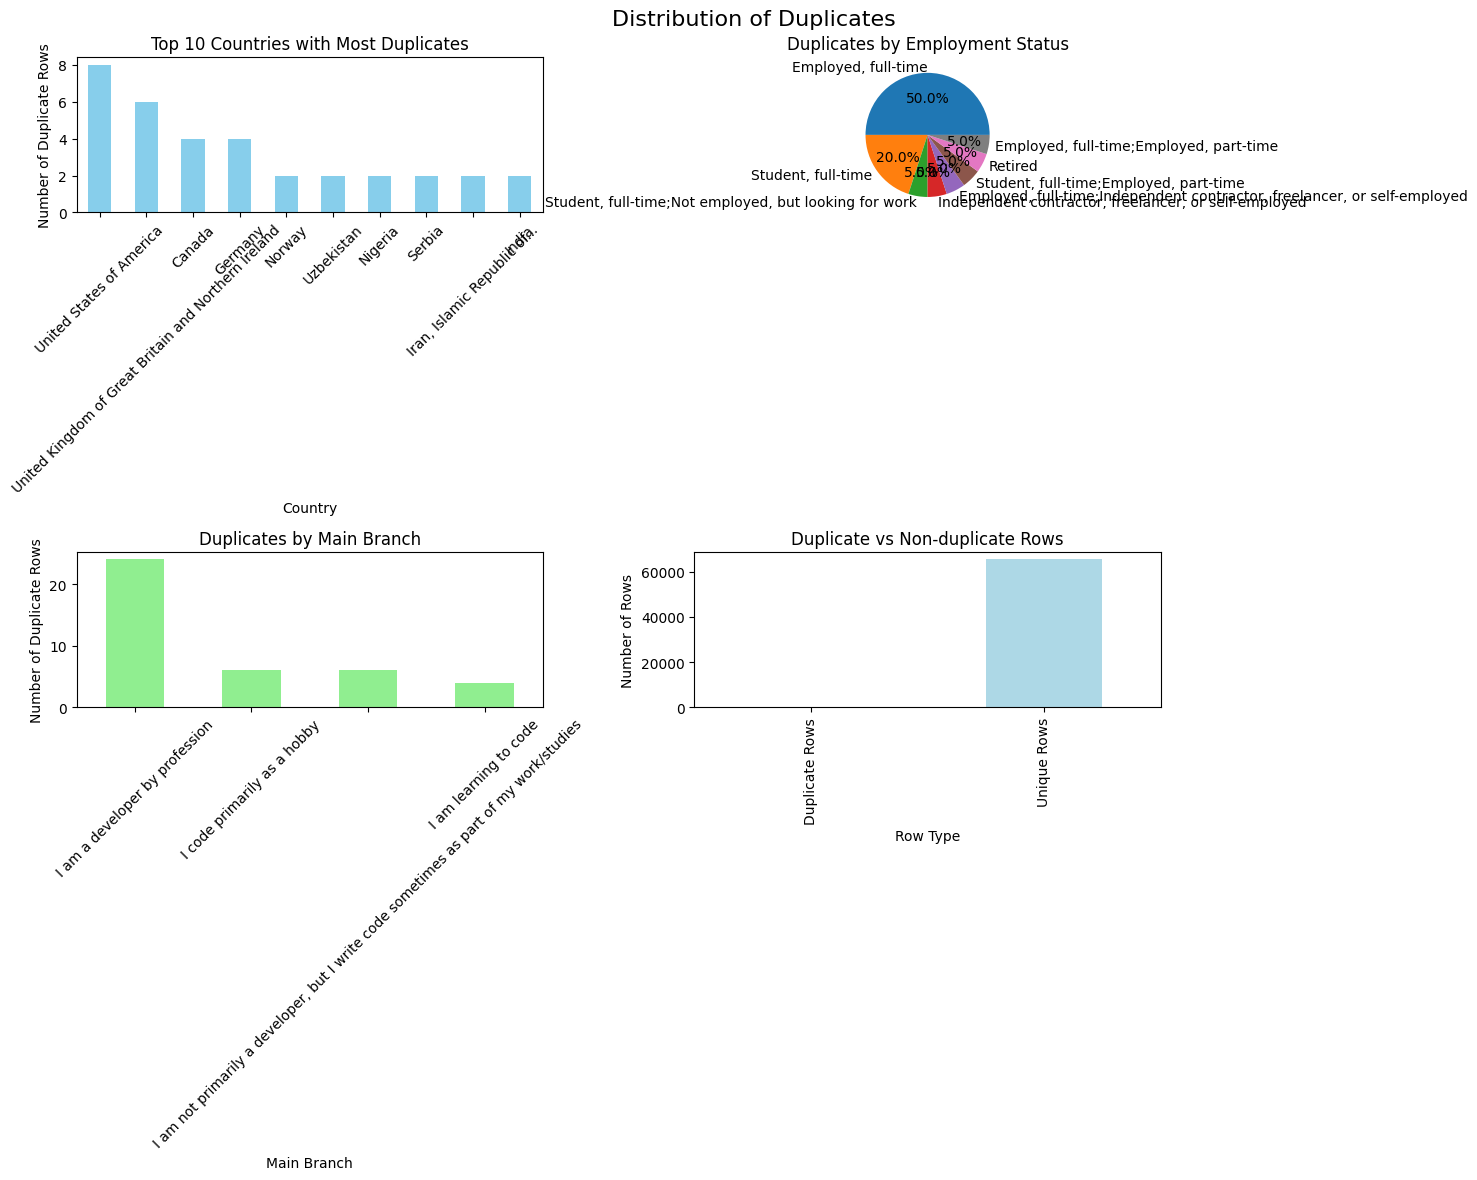

2. Visualization statistics:
   Total rows: 65457
   Duplicate rows: 40 (0.1%)
   Unique rows: 65417 (99.9%)


In [13]:
## Write your code here

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Duplicates', fontsize=16)


axes[0, 0].set_title('Top 10 Countries with Most Duplicates')


duplicate_mask = df.duplicated(keep=False)
duplicate_countries = df[duplicate_mask]['Country'].value_counts().head(10)

if len(duplicate_countries) > 0:
    duplicate_countries.plot(kind='bar', ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_xlabel('Country')
    axes[0, 0].set_ylabel('Number of Duplicate Rows')
    axes[0, 0].tick_params(axis='x', rotation=45)
else:
    axes[0, 0].text(0.5, 0.5, 'No duplicates found by country', 
                   horizontalalignment='center', verticalalignment='center')
    axes[0, 0].set_xlabel('No data')


axes[0, 1].set_title('Duplicates by Employment Status')

employment_counts = df[duplicate_mask]['Employment'].value_counts()
if len(employment_counts) > 0:
    employment_counts.plot(kind='pie', ax=axes[0, 1], autopct='%1.1f%%')
    axes[0, 1].set_ylabel('')
else:
    axes[0, 1].text(0.5, 0.5, 'No duplicates found by employment', 
                   horizontalalignment='center', verticalalignment='center')

# 4. Bar chart: Duplicates by MainBranch
axes[1, 0].set_title('Duplicates by Main Branch')

mainbranch_counts = df[duplicate_mask]['MainBranch'].value_counts()
if len(mainbranch_counts) > 0:
    mainbranch_counts.plot(kind='bar', ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_xlabel('Main Branch')
    axes[1, 0].set_ylabel('Number of Duplicate Rows')
    axes[1, 0].tick_params(axis='x', rotation=45)
else:
    axes[1, 0].text(0.5, 0.5, 'No duplicates found by main branch', 
                   horizontalalignment='center', verticalalignment='center')


axes[1, 1].set_title('Duplicate vs Non-duplicate Rows')

status_counts = pd.Series({
    'Duplicate Rows': duplicate_mask.sum(),
    'Unique Rows': (~duplicate_mask).sum()
})
status_counts.plot(kind='bar', ax=axes[1, 1], color=['orange', 'lightblue'])
axes[1, 1].set_xlabel('Row Type')
axes[1, 1].set_ylabel('Number of Rows')

plt.tight_layout()
plt.show()

print("2. Visualization statistics:")
print(f"   Total rows: {len(df)}")
print(f"   Duplicate rows: {duplicate_mask.sum()} ({duplicate_mask.sum()/len(df)*100:.1f}%)")
print(f"   Unique rows: {(~duplicate_mask).sum()} ({(~duplicate_mask).sum()/len(df)*100:.1f}%)")

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [14]:
## Write your code here
#print(f"   - ResponseId: Should be unique (Current duplicates: {df['ResponseId'].duplicated().sum()})")

#print("\n   Checking other columns for uniqueness:")
for col in ['ResponseId', 'MainBranch', 'Employment', 'Country', 'Age']:
    unique_count = df[col].nunique()
    duplicate_count = df[col].duplicated().sum()
    print(f"   - {col}: {unique_count} unique values, {duplicate_count} duplicates")

initial_count = len(df)
df_no_full_duplicates = df.drop_duplicates()
full_duplicates_removed = initial_count - len(df_no_full_duplicates)
#print(f"   Removed {full_duplicates_removed} complete duplicate rows")
#print(f"   Remaining rows: {len(df_no_full_duplicates)}")

df_clean = df_no_full_duplicates.drop_duplicates(subset=['ResponseId'], keep='first')
responseid_duplicates_removed = len(df_no_full_duplicates) - len(df_clean)
#print(f"   Removed {responseid_duplicates_removed} rows with duplicate ResponseId")
#print(f"   Remaining rows: {len(df_clean)}")


demographic_cols = ['MainBranch', 'Employment', 'RemoteWork', 'Country', 'Age']
print(f"   Checking duplicates in demographic columns: {demographic_cols}")


demographic_duplicates = df_clean.duplicated(subset=demographic_cols, keep=False)
print(f"   Rows with same demographic info: {demographic_duplicates.sum()}")

if demographic_duplicates.sum() > 0:
    print("   Sample of demographic duplicates:")
    demo_dup_rows = df_clean[demographic_duplicates].head()
    print(demo_dup_rows[['ResponseId'] + demographic_cols])

    df_final = df_clean.drop_duplicates(subset=demographic_cols, keep='first')
    demo_duplicates_removed = len(df_clean) - len(df_final)
    print(f"\n   Removed {demo_duplicates_removed} demographic duplicates")
else:
    df_final = df_clean
    demo_duplicates_removed = 0

print("\n5. Cleaning summary:")
print(f"   Initial rows: {initial_count}")
print(f"   After removing complete duplicates: {len(df_no_full_duplicates)}")
print(f"   After removing ResponseId duplicates: {len(df_clean)}")
print(f"   After removing demographic duplicates: {len(df_final)}")
print(f"   Total rows removed: {initial_count - len(df_final)}")
print(f"   Final dataset has {len(df_final)} unique rows")

# Save cleaned dataset
df_final.to_csv('survey_data_cleaned.csv', index=False)
print("\n   Cleaned dataset saved as 'survey_data_cleaned.csv'")

   - ResponseId: 65437 unique values, 20 duplicates
   - MainBranch: 5 unique values, 65452 duplicates
   - Employment: 110 unique values, 65347 duplicates
   - Country: 185 unique values, 65271 duplicates
   - Age: 8 unique values, 65449 duplicates
   Checking duplicates in demographic columns: ['MainBranch', 'Employment', 'RemoteWork', 'Country', 'Age']
   Rows with same demographic info: 58178
   Sample of demographic duplicates:
   ResponseId                      MainBranch           Employment RemoteWork  \
1           2  I am a developer by profession  Employed, full-time     Remote   
2           3  I am a developer by profession  Employed, full-time     Remote   
3           4           I am learning to code   Student, full-time        NaN   
4           5  I am a developer by profession   Student, full-time        NaN   
5           6     I code primarily as a hobby   Student, full-time        NaN   

                                             Country                 Age  
1

## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
